# Data Preprocessing for Modeling

In this notebook, we continue working on the Titanic data to predict survival by including more predictor variables. In particular, our code will:
- Handle missing values
- Encode categorical variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load dataset
df = pd.read_csv('../data/titanic_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# PassengerId and name are not very useful for predicting 
# assume we cannot get useful information for prediction from ticket number 
# let's drop these columns
df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## Handling Missing Values

There are two main types of approaches to handle missing values in data: 
- **Drop**
    - Drop instances with missing values
    - Drop attributes with missing values
- **Fill**
    - *Univariate Imputation*: filling the variable using values from the same variable, such as mean, median, most frequent, immediate before/after, etc.
    - *Multivariate Imputation*: imputing the variable's missing values via model-based approaches using other varibles. (https://scikit-learn.org/stable/modules/impute.html)

In [5]:
# total null values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
# given that only 2 out of 891 rows have missing values for Embarked - let's drop those two rows
# drop the observations/rows with missing values using dropna()
# note - we are not dropping the Embarked column!!
df.dropna(subset=['Embarked'], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [7]:
# no missing values for Embarked
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [8]:
# given 687 out of 891 rows have missing values for Cabin feature, let's drop this feature/column
# axis defaults to 0, which means row, here we are dropping the column, therefore axis=1
df.drop('Cabin', axis=1, inplace=True)
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

<AxesSubplot:>

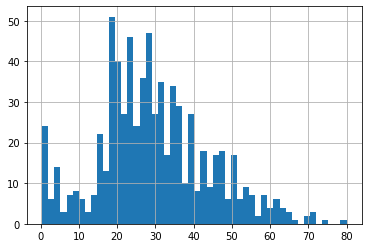

In [9]:
# we cannot drop Age feature, which does not have as many as missing values as Cabin
df['Age'].hist(bins=50)

In [10]:
df['Age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [11]:
df['Age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [12]:
# method 1: fill the missing values with median using fillna()
# note that I don't use inplace=True because I want to demostrate another method
median = df['Age'].median()
df_fill_median = df['Age'].fillna(median)
df_fill_median.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [13]:
# method 2: fill the missing values with median using Scikit-Learn SimpleImputer
# this approach can do imputation for all numerical attrributes all at once
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(strategy='median')

# select only numerical attributes for Imputer
# NOTE: Technically, Pclass (Ticket class with values 1, 2, or 3) is a categorial attribute.
# we treat Pclass as a numerical attribute here to keep it simple. 
df_num = df.select_dtypes(include=['int64','float64'])

# the following computes median for each attributes and store the result in statistics_ build_in variable
df_num_fill_median = median_imputer.fit_transform(df_num)  
median_imputer.statistics_  # same result as df_num.median().values

array([ 0.    ,  3.    , 28.    ,  0.    ,  0.    , 14.4542])

In [14]:
df_num.median().values

array([ 0.    ,  3.    , 28.    ,  0.    ,  0.    , 14.4542])

In [15]:
# imputer returns a numpy array
df_num_fill_median

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 0.    ,  3.    , 28.    ,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 0.    ,  3.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [16]:
# change a numpy array to a DataFrame
df_num_fill_median = pd.DataFrame(df_num_fill_median, columns=df_num.columns)  
df_num_fill_median.isnull().sum()  # no missing values

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

## Processing the Target Column

Save the target column and drop it from the training set. Since the target column has no missing values now and we normally don't need to encode target column (even if it has categorical values), let's save it and then drop it form the training set. 

In [17]:
# set the target
y = df_num_fill_median['Survived']
df_num_fill_median.drop(['Survived'], axis=1, inplace=True)
df_num_fill_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  889 non-null    float64
 1   Age     889 non-null    float64
 2   SibSp   889 non-null    float64
 3   Parch   889 non-null    float64
 4   Fare    889 non-null    float64
dtypes: float64(5)
memory usage: 34.9 KB


## Processing Categorical Variables 

So far, we have only included numerical variables in the model. Next, we will handle categorical variables. 

In [18]:
# get categorial attributes
df_cat = df.select_dtypes(['object'])
df_cat.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [19]:
df_cat.describe()

,Sex,Embarked
count,889,889
unique,2,3
top,male,S
freq,577,644


In [20]:
# encode categorical values to integers
from sklearn.preprocessing import OrdinalEncoder

cat_encoder = OrdinalEncoder()
df_cat_encoded = cat_encoder.fit_transform(df_cat)
# categories are listed in order ['female', 'male']-> 0, 1; ['C', 'Q', 'S']-> 0, 1, 2
cat_encoder.categories_ 

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [21]:
# encoder returns a numpy array
df_cat_encoded

array([[1., 2.],
       [0., 0.],
       [0., 2.],
       ...,
       [0., 2.],
       [1., 0.],
       [1., 1.]])

In [22]:
# change df_cat_encoded into dataframe
df_cat_encoded = pd.DataFrame(df_cat_encoded, columns=df_cat.columns) 
df_cat_encoded

,Sex,Embarked
0,1.0,2.0
1,0.0,0.0
2,0.0,2.0
3,0.0,2.0
4,1.0,2.0
...,...,...
884,1.0,2.0
885,0.0,2.0
886,0.0,2.0
887,1.0,0.0


In [23]:
# the same cat_encoder can be used to encode new data
new_data = [['male', 'S']]
new_data_encoded = cat_encoder.transform(new_data)
print(new_data_encoded)

[[1. 2.]]


Let's pause here and consider this: 

Is this ordinal encoder appropriate for encoding these two variables? Why or why not? 

In [24]:
# Using one-hot encoding
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
df_cat_onehot_encoded = onehot_encoder.fit_transform(df_cat)

onehot_encoder.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

array(['x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S'], dtype=object)

In [25]:
column_names = onehot_encoder.get_feature_names()
column_names

array(['x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S'], dtype=object)

In [26]:
# onehot encoder returns a sparse matrix and we convert that to a numpy array
df_cat_onehot_encoded = df_cat_onehot_encoded.toarray()

In [27]:
# change df_onehot_encoded to a Dataframe
df_cat_onehot_encoded = pd.DataFrame(df_cat_onehot_encoded, columns=column_names)
df_cat_onehot_encoded.head()

,x0_female,x0_male,x1_C,x1_Q,x1_S
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0


In [28]:
# the same onehot_encoder can be used to encode new data
new_data1 = [['male', 'S']]
new_data1_encoded = onehot_encoder.transform(new_data1)
print(new_data1_encoded.toarray())

[[0. 1. 0. 0. 1.]]


Is the onehot encoder a better choice for encoding these two categorical variables? 

## Build the model

Now we can prepare for the final train dataset and build the model:

We first generated the following dataframes:
- `df`: original df after dropping a few columns
- `df_fill_median`: df with Age filled using median via fillna(), same shape as df

Then, we split the df into numerical and categorical dataframes:
- `df_num`: numerical columns only
- `df_num_fill_median`: df_num with Age filled using SimpleImputer
- `df_cat`: categorical columns only
- `df_cat_encoded`: df_cat encoded using Ordinal Encoder
- `df_cat_onehot_encoded`: df_cat encoded using OneHot Encoder

Now, we can preparing the final training dataset by combining some of them. 

In [29]:
# traning dataset using ordinal encoder
titanic_train_encoded = pd.concat([df_num_fill_median, df_cat_encoded], axis=1)
titanic_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    float64
 1   Age       889 non-null    float64
 2   SibSp     889 non-null    float64
 3   Parch     889 non-null    float64
 4   Fare      889 non-null    float64
 5   Sex       889 non-null    float64
 6   Embarked  889 non-null    float64
dtypes: float64(7)
memory usage: 48.7 KB


In [30]:
# traning dataset using onehot encoder
titanic_train_onehot_encoded = pd.concat([df_num_fill_median, df_cat_onehot_encoded], axis=1)
titanic_train_onehot_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     889 non-null    float64
 1   Age        889 non-null    float64
 2   SibSp      889 non-null    float64
 3   Parch      889 non-null    float64
 4   Fare       889 non-null    float64
 5   x0_female  889 non-null    float64
 6   x0_male    889 non-null    float64
 7   x1_C       889 non-null    float64
 8   x1_Q       889 non-null    float64
 9   x1_S       889 non-null    float64
dtypes: float64(10)
memory usage: 69.6 KB


In [31]:
# train a DT model using titanic_train_encoded
from sklearn.tree import DecisionTreeClassifier
tree_clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
tree_clf1.fit(titanic_train_encoded, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [32]:
# train another DT model using titanic_train_onehot_encoded
from sklearn.tree import DecisionTreeClassifier
tree_clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=3)
tree_clf2.fit(titanic_train_onehot_encoded, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

## Make Predictions

When we train tree_clf1/tree_clf2 above, titanic_train_encoded/titanic_train_onehot_encoded is the input dataframe we used. 

When we make predictions, the input dataframe we feed into the model **MUST** match the structure (the number of columns with specific order) of titanic_train_encoded/titanic_train_onehot_encoded.

In [33]:
df_test = pd.read_csv('../data/titanic_test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [34]:
# save PassengerId column for submission
df_test_id = df_test['PassengerId']

In [35]:
df_test_id.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [36]:
# we dropped PassengerId, Name, Cabin, Ticket when training the model
# so we should drop those columns for prediction
df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [37]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [38]:
# we also need to handle missing values for the testing set
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [39]:
# we use SimpleImputer to fill missing values in Age and Fare using median
median_imputer = SimpleImputer(strategy='median')

# select only numerical attributes for Imputer
df_test_num = df_test.select_dtypes(include=['int64','float64'])

# the following computes median for each attributes and store the result in statistics_ variable
df_test_num_fill_median = median_imputer.fit_transform(df_test_num)  

# convert df_test_num_fill_mean to dataframe
df_test_num_fill_median = pd.DataFrame(df_test_num_fill_median, columns=df_test_num.columns)  
df_test_num_fill_median.isnull().sum()  # no missing values

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [40]:
# test numerical dtatframe shape is 418x5
df_test_num_fill_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    float64
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    float64
 3   Parch   418 non-null    float64
 4   Fare    418 non-null    float64
dtypes: float64(5)
memory usage: 16.5 KB


In [41]:
# select only categorical attributes for Encoder
df_test_cat = df_test.select_dtypes(include=['object'])
df_test_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       418 non-null    object
 1   Embarked  418 non-null    object
dtypes: object(2)
memory usage: 6.7+ KB


In [42]:
df_test_cat.head()

,Sex,Embarked
0,male,Q
1,female,S
2,male,Q
3,male,S
4,female,S


In [43]:
# You must encode the test categorical dataframe 
# using the Ordinal Encoder we created for the training set
# DO NOT create a new encoder!!!

df_test_cat_encoded = cat_encoder.transform(df_test_cat)

# convert df_test_cat_encoded to dataframe
df_test_cat_encoded = pd.DataFrame(df_test_cat_encoded, columns=df_test_cat.columns)

In [44]:
df_test_cat_encoded.head()

,Sex,Embarked
0,1.0,1.0
1,0.0,2.0
2,1.0,1.0
3,1.0,2.0
4,0.0,2.0


In [45]:
# combine the dataframes as the test input dataframe
titanic_test_encoded = pd.concat([df_test_num_fill_median, df_test_cat_encoded], axis=1)
titanic_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    float64
 1   Age       418 non-null    float64
 2   SibSp     418 non-null    float64
 3   Parch     418 non-null    float64
 4   Fare      418 non-null    float64
 5   Sex       418 non-null    float64
 6   Embarked  418 non-null    float64
dtypes: float64(7)
memory usage: 23.0 KB


In [46]:
# the column array for the testing input dataframe using ordinal encoding
titanic_test_encoded.columns.values

array(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked'],
      dtype=object)

In [47]:
# the column array for the training input dataframe using ordinal encoding
titanic_train_encoded.columns.values

array(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked'],
      dtype=object)

In [48]:
titanic_test_encoded.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,3.0,34.5,0.0,0.0,7.8292,1.0,1.0
1,3.0,47.0,1.0,0.0,7.0000,0.0,2.0
2,2.0,62.0,0.0,0.0,9.6875,1.0,1.0
3,3.0,27.0,0.0,0.0,8.6625,1.0,2.0
4,3.0,22.0,1.0,1.0,12.2875,0.0,2.0


In [49]:
# make prediction using the first tree
y_hat_ordinal = tree_clf1.predict(titanic_test_encoded)
y_hat_ordinal.shape

(418,)

In [50]:
# Note, the numbers here are float numbers with decimal, we need to convert them to integer
# if you don't do this, your score on Kaggle will be 0
y_hat_ordinal

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [51]:
y_hat_ordinal.astype(int)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [52]:
# make the dataframe for submission by combining two columns
tree1_ordinal_submit = pd.DataFrame({
    'PassengerId': df_test_id, 
    'Survived': y_hat_ordinal.astype(int),
})

In [66]:
tree1_ordinal_submit.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [67]:
# save the resulting dataframe as a csv file for Kaggle submission
tree1_ordinal_submit.to_csv('../data/tree1_ordinal_submit.csv', index=False) 

## Assignment 

Next, you need to follow the same process and apply the second decision tree "tree_clf2" to the test set with the two categorical variables 'Sex' and 'Embarked' encoded by the 'onehot_encoder'. Name the output file "tree2_onhot_submit.csv" 

In [73]:
df_test_cat


,Sex,Embarked
0,male,Q
1,female,S
2,male,Q
3,male,S
4,female,S
...,...,...
413,male,S
414,female,C
415,male,S
416,male,S


In [91]:
df_test_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       418 non-null    object
 1   Embarked  418 non-null    object
dtypes: object(2)
memory usage: 6.7+ KB


In [90]:
df_cat_onehot_encoded = onehot_encoder.transform(df_test_cat)
df_cat_onehot_encoded = pd.DataFrame(df_cat_onehot_encoded, columns=df_test_cat.columns) 

ValueError: Shape of passed values is (418, 1), indices imply (418, 2)